# Magic: The Gathering Market Analysis 
* Physical Cards, English Only, Retail Pricing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/cards.csv')
# see all columns
pd.set_option('display.max_columns', None)
df.info()

C:\Users\arsta\AppData\Local\Temp\ipykernel_54732\1273922524.py:1: DtypeWarning: Columns (3,7,12,16,20,23,25,26,31,33,34,36,38,40,41,42,48,53,54,61,62,66,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/cards.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105961 entries, 0 to 105960
Data columns (total 78 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   artist                   105446 non-null  object 
 1   artistIds                105446 non-null  object 
 2   asciiName                245 non-null     object 
 3   attractionLights         135 non-null     object 
 4   availability             105961 non-null  object 
 5   boosterTypes             52933 non-null   object 
 6   borderColor              105961 non-null  object 
 7   cardParts                15 non-null      object 
 8   colorIdentity            94278 non-null   object 
 9   colorIndicator           985 non-null     object 
 10  colors                   83066 non-null   object 
 11  defense                  55 non-null      float64
 12  duelDeck                 1594 non-null    object 
 13  edhrecRank               97702 non-null   float64
 14  edhr

In [3]:
df.head(3)

,artist,artistIds,asciiName,attractionLights,availability,boosterTypes,borderColor,cardParts,colorIdentity,colorIndicator,colors,defense,duelDeck,edhrecRank,edhrecSaltiness,faceConvertedManaCost,faceFlavorName,faceManaValue,faceName,finishes,flavorName,flavorText,frameEffects,frameVersion,hand,hasAlternativeDeckLimit,hasContentWarning,hasFoil,hasNonFoil,isAlternative,isFullArt,isFunny,isGameChanger,isOnlineOnly,isOversized,isPromo,isRebalanced,isReprint,isReserved,isStarter,isStorySpotlight,isTextless,isTimeshifted,keywords,language,layout,leadershipSkills,life,loyalty,manaCost,manaValue,name,number,originalPrintings,originalReleaseDate,originalText,otherFaceIds,power,printings,promoTypes,rarity,rebalancedPrintings,relatedCards,securityStamp,setCode,side,signature,sourceProducts,subsets,subtypes,supertypes,text,toughness,type,types,uuid,variations,watermark
0,Pete Venters,d54c4a1a-c0c5-4834-84db-125d341f3ad8,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,W,NaN,NaN,23261.0,NaN,NaN,NaN,NaN,NaN,nonfoil,NaN,NaN,NaN,2003,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,First strike,English,normal,NaN,NaN,NaN,{5}{W}{W},7.0,Ancestor's Chosen,1,NaN,NaN,First strike (This creature deals combat damag...,NaN,4,"10E, JUD, UMA",NaN,uncommon,NaN,NaN,NaN,10E,NaN,NaN,"{""nonfoil"": [""3a10f018-17fe-56a7-91ba-b4bd9867...",NaN,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,b7c19924-b4bf-56fc-aa73-f586e940bd42,NaN
1,Pete Venters,d54c4a1a-c0c5-4834-84db-125d341f3ad8,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,W,NaN,NaN,23261.0,NaN,NaN,NaN,NaN,NaN,foil,NaN,"""The will of all, by my hand done.""",NaN,2003,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,First strike,English,normal,NaN,NaN,NaN,{5}{W}{W},7.0,Ancestor's Chosen,1★,NaN,NaN,NaN,NaN,4,"10E, JUD, UMA",NaN,uncommon,NaN,NaN,NaN,10E,NaN,NaN,"{""foil"": [""c5cd29de-5ec9-5e13-b8eb-40e3a9f79f9...",NaN,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,NaN
2,Volkan Baǵa,93bec3c0-0260-4d31-8064-5d01efb4153f,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,W,NaN,NaN,18316.0,0.12,NaN,NaN,NaN,NaN,nonfoil,NaN,Every tear shed is a drop of immortality.,NaN,2003,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,Flying,English,normal,NaN,NaN,NaN,{4}{W},5.0,Angel of Mercy,2,NaN,NaN,Flying (This creature can't be blocked except ...,NaN,3,"10E, 8ED, 9ED, DDC, DVD, IMA, INV, J25, JMP, P...",NaN,uncommon,NaN,NaN,NaN,10E,NaN,NaN,"{""nonfoil"": [""3210bf43-80f4-5ae4-be77-f6584879...",NaN,Angel,NaN,"Flying\nWhen this creature enters, you gain 3 ...",3,Creature — Angel,Creature,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,NaN


In [4]:
df.shape

(105961, 78)

In [5]:
# statistical overview of numbered columns (probably won't need)
df.describe()

,defense,edhrecRank,edhrecSaltiness,faceConvertedManaCost,faceManaValue,hand,life,manaValue
count,55.000000,97702.000000,72389.000000,4205.000000,4205.000000,119.000000,119.000000,105961.000000
mean,4.654545,10953.975855,0.366867,2.272057,2.272057,0.084034,1.084034,21.869070
std,1.004032,8775.520794,0.355103,2.011431,2.011431,1.211385,5.683130,4344.488674
min,3.000000,1.000000,0.010000,0.000000,0.000000,-4.000000,-8.000000,0.000000
25%,4.000000,2951.000000,0.120000,0.000000,0.000000,-1.000000,-3.000000,2.000000
50%,4.000000,9210.000000,0.260000,2.000000,2.000000,0.000000,0.000000,3.000000
75%,5.000000,17951.750000,0.480000,4.000000,4.000000,1.000000,4.000000,4.000000
max,7.000000,29730.000000,3.120000,11.000000,11.000000,3.000000,30.000000,1000000.000000


* There are a ton of missing values, but that makes sense because some card types have no integer values (e.g. sorceries don't have creature power).  
* Looking to keep: availability, colors, name, printings, rarity, setCode, types, and uuid (for joining cardPrices.csv and setDetails.csv)

In [6]:
# To see the card Name column (keep)
df.loc[:, 'name']

0           Ancestor's Chosen
1           Ancestor's Chosen
2              Angel of Mercy
3              Angel of Mercy
4            Angelic Blessing
                 ...         
105956          Into the Roil
105957    Bloodchief's Thirst
105958          Roil Eruption
105959       Roiling Regrowth
105960       Kargan Warleader
Name: name, Length: 105961, dtype: object

* Determining columns we want to keep in this initial data frame

In [7]:
# For a full ist of collumns (most of these probably can be dropped for our purposes)
df.columns

Index(['artist', 'artistIds', 'asciiName', 'attractionLights', 'availability',
       'boosterTypes', 'borderColor', 'cardParts', 'colorIdentity',
       'colorIndicator', 'colors', 'defense', 'duelDeck', 'edhrecRank',
       'edhrecSaltiness', 'faceConvertedManaCost', 'faceFlavorName',
       'faceManaValue', 'faceName', 'finishes', 'flavorName', 'flavorText',
       'frameEffects', 'frameVersion', 'hand', 'hasAlternativeDeckLimit',
       'hasContentWarning', 'hasFoil', 'hasNonFoil', 'isAlternative',
       'isFullArt', 'isFunny', 'isGameChanger', 'isOnlineOnly', 'isOversized',
       'isPromo', 'isRebalanced', 'isReprint', 'isReserved', 'isStarter',
       'isStorySpotlight', 'isTextless', 'isTimeshifted', 'keywords',
       'language', 'layout', 'leadershipSkills', 'life', 'loyalty', 'manaCost',
       'manaValue', 'name', 'number', 'originalPrintings',
       'originalReleaseDate', 'originalText', 'otherFaceIds', 'power',
       'printings', 'promoTypes', 'rarity', 'rebalancedPrin

In [8]:
# Specify the needed columns
df = df[["availability", "colors", "language", "name", "rarity", "setCode", "types", "uuid"]]

df

,availability,colors,language,name,rarity,setCode,types,uuid
0,"mtgo, paper",W,English,Ancestor's Chosen,uncommon,10E,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,"mtgo, paper",W,English,Ancestor's Chosen,uncommon,10E,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,"mtgo, paper",W,English,Angel of Mercy,uncommon,10E,Creature,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,"mtgo, paper",W,English,Angel of Mercy,uncommon,10E,Creature,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,"mtgo, paper",W,English,Angelic Blessing,common,10E,Sorcery,55bd38ca-dc73-5c06-8f80-a6ddd2f44382
...,...,...,...,...,...,...,...,...
105956,"mtgo, paper",U,English,Into the Roil,common,ZNR,Instant,3f492516-7767-5ed7-a1d4-e3f7c06aee2f
105957,"mtgo, paper",B,English,Bloodchief's Thirst,uncommon,ZNR,Sorcery,3f9a0369-5fe7-5aee-85fe-3cfaacd275af
105958,"mtgo, paper",R,English,Roil Eruption,common,ZNR,Sorcery,97577e9e-69a9-5a8b-9c24-a72703790046
105959,"mtgo, paper",G,English,Roiling Regrowth,uncommon,ZNR,Instant,deb51cbd-b890-5b2d-9d6f-7b896e16c6fd


In [9]:
df.describe()

,availability,colors,language,name,rarity,setCode,types,uuid
count,105961,83066,105961,105961,105961,105961,105961,105961
unique,8,40,18,32547,6,727,51,105961
top,"mtgo, paper",G,English,Forest,rare,PLST,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
freq,40847,14249,103489,918,39637,5074,46191,1


In [10]:
# identify NA and Null values for the newly specified df columns
df.isna().sum()

availability        0
colors          22895
language            0
name                0
rarity              0
setCode             0
types               0
uuid                0
dtype: int64

In [11]:
df.loc[df['colors'].isna()]

,availability,colors,language,name,rarity,setCode,types,uuid
423,"mtgo, paper",NaN,English,Angel's Feather,uncommon,10E,Artifact,da0a5791-2fc2-53e4-bc8b-c4d8cd026ded
424,"mtgo, paper",NaN,English,Bottle Gnomes,uncommon,10E,"Artifact, Creature",8402d391-a810-5c04-af77-d3fb01dbacca
425,"mtgo, paper",NaN,English,Chimeric Staff,rare,10E,Artifact,da8f1e81-fc1f-57f4-b4ec-0c5445a299e8
426,"mtgo, paper",NaN,English,Chromatic Star,uncommon,10E,Artifact,3785490a-01f5-511d-b471-60b1209b3d4f
427,"mtgo, paper",NaN,English,Citanul Flute,rare,10E,Artifact,b0a0f3ea-f483-53e3-ae41-bdb409141fdf
...,...,...,...,...,...,...,...,...
105949,"arena, mtgo, paper",NaN,English,Plains,common,ZNR,Land,45260a6a-bb6a-521c-98c3-cd6643ac4f46
105950,"arena, mtgo, paper",NaN,English,Island,common,ZNR,Land,bc649741-e3df-531f-b52c-b3634cb80c7b
105951,"arena, mtgo, paper",NaN,English,Swamp,common,ZNR,Land,8148c863-ee4b-5204-b115-3f172931e08c
105952,"arena, mtgo, paper",NaN,English,Mountain,common,ZNR,Land,6c9650e9-4b6c-5954-94eb-dc6c0418a760


* There are cards that are inherently "colorless" in MTG. It's interesting that they are not labeled as such in this dataset and are NaN instead.  
* Checking to make sure those are all listed as "NaN" instead of a different designation.  
* B, G, R, U, W are all valid color codes (cards can be multiple colors).  

In [12]:
df["colors"].unique()

array(['W', 'U', 'B', 'R', 'G', nan, 'B, G, W', 'U, W', 'B, U', 'B, U, W',
       'B, W', 'G, R, U', 'R, U', 'B, R', 'B, G', 'G, R', 'G, R, W',
       'R, W', 'G, U, W', 'G, U', 'B, G, R, U, W', 'G, W', 'B, R, W',
       'R, U, W', 'B, G, R', 'B, R, U', 'B, G, U', 'B, G, U, W',
       'B, R, U, W', 'G, R, U, W', 'B, G, R, W', 'B, G, R, U', 'W, U',
       'U, B', 'U, G', 'W, R', 'U, R', 'R, G', 'W, G', 'W, B', 'U, R, G'],
      dtype=object)

In [13]:
df.loc[df["colors"].isna(), "types"].unique()

array(['Artifact', 'Artifact, Creature', 'Land', 'Creature',
       'Planeswalker', 'Artifact, Land', 'Sorcery', 'Instant',
       'Enchantment', 'Enchantment, Creature', 'Vanguard',
       'Enchantment, Land', 'Land, Creature', 'Kindred, Sorcery',
       'Kindred, Instant', 'Conspiracy', 'Plane', 'Scheme',
       'Artifact, Planeswalker', 'Kindred, Artifact',
       'Kindred, Enchantment', 'Poly, Artifact', 'Phenomenon', 'Battle',
       'Dungeon', 'pLAnE', 'Stickers', 'Hero', 'Hero, Artifact',
       'Artifact, Enchantment', 'Phenome-nom'], dtype=object)

In [14]:
# Replace all NaN with "C" for "Colorless"
df["colors"] = df["colors"].fillna("C")

In [15]:
# Check to see if it worked
df.loc[df["colors"].isna(), "types"].unique()

array([], dtype=object)

In [16]:
# Second check
df["colors"].unique()

array(['W', 'U', 'B', 'R', 'G', 'C', 'B, G, W', 'U, W', 'B, U', 'B, U, W',
       'B, W', 'G, R, U', 'R, U', 'B, R', 'B, G', 'G, R', 'G, R, W',
       'R, W', 'G, U, W', 'G, U', 'B, G, R, U, W', 'G, W', 'B, R, W',
       'R, U, W', 'B, G, R', 'B, R, U', 'B, G, U', 'B, G, U, W',
       'B, R, U, W', 'G, R, U, W', 'B, G, R, W', 'B, G, R, U', 'W, U',
       'U, B', 'U, G', 'W, R', 'U, R', 'R, G', 'W, G', 'W, B', 'U, R, G'],
      dtype=object)

* We are strictly looking at physical cards (paper) and not cards that are solely available for online play.  
* This is due to the wild disparity between online and physical cards. Looking only to gauge physical market.  

In [17]:
df[df["availability"] == "mtgo"]

,availability,colors,language,name,rarity,setCode,types,uuid
5748,mtgo,U,English,Vizzerdrix,rare,8ED,Creature,3ebaaff5-b2ca-5f8c-ba0a-52bbf7370f20
6464,mtgo,U,English,Vizzerdrix,rare,9ED,Creature,1aebb788-b6b4-5332-9532-d96da074cc6a
51922,mtgo,W,English,Angry Mob,uncommon,ME1,Creature,794948e1-4a0f-52e1-bd56-cde1ba99ab3b
51923,mtgo,W,English,Animate Wall,uncommon,ME1,Enchantment,2193fd6f-294f-59de-8ca6-d1c411fcdfda
51924,mtgo,W,English,Argivian Archaeologist,rare,ME1,Creature,8319cfd6-d509-534c-a4c7-3eda07c9fcd3
...,...,...,...,...,...,...,...,...
99997,mtgo,C,English,Tropical Island,rare,VMA,Land,600a90cf-e426-5b8a-915c-6bf9d655f9a8
99998,mtgo,C,English,Tundra,rare,VMA,Land,f799dbb8-5caf-5415-bff5-cbfd3ebb0c5a
99999,mtgo,C,English,Underground Sea,rare,VMA,Land,24981f20-226f-5be3-821e-0ce73532eb03
100000,mtgo,C,English,Volcanic Island,rare,VMA,Land,1c92f806-ac8b-576c-995a-7c9d4197633c


In [18]:
# This also accounts for why we're seeing so many rows with the same names
df.duplicated(subset=["name"], keep=False)

0         True
1         True
2         True
3         True
4         True
          ... 
105956    True
105957    True
105958    True
105959    True
105960    True
Length: 105961, dtype: bool

In [19]:
df.value_counts('availability')

availability
mtgo, paper           40847
paper                 37369
arena, mtgo, paper    17324
mtgo                   5563
arena                  3684
arena, paper           1152
shandalar                12
dreamcast                10
Name: count, dtype: int64

In [20]:
# Specifying the rows to keep involving paper
df = df[
    (df["availability"] == "mtgo, paper") | 
    (df["availability"] == "paper") | 
    (df["availability"] == "arena, mtgo, paper") |
    (df["availability"] == "arena, paper") 
    ]

df

,availability,colors,language,name,rarity,setCode,types,uuid
0,"mtgo, paper",W,English,Ancestor's Chosen,uncommon,10E,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,"mtgo, paper",W,English,Ancestor's Chosen,uncommon,10E,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,"mtgo, paper",W,English,Angel of Mercy,uncommon,10E,Creature,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,"mtgo, paper",W,English,Angel of Mercy,uncommon,10E,Creature,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,"mtgo, paper",W,English,Angelic Blessing,common,10E,Sorcery,55bd38ca-dc73-5c06-8f80-a6ddd2f44382
...,...,...,...,...,...,...,...,...
105956,"mtgo, paper",U,English,Into the Roil,common,ZNR,Instant,3f492516-7767-5ed7-a1d4-e3f7c06aee2f
105957,"mtgo, paper",B,English,Bloodchief's Thirst,uncommon,ZNR,Sorcery,3f9a0369-5fe7-5aee-85fe-3cfaacd275af
105958,"mtgo, paper",R,English,Roil Eruption,common,ZNR,Sorcery,97577e9e-69a9-5a8b-9c24-a72703790046
105959,"mtgo, paper",G,English,Roiling Regrowth,uncommon,ZNR,Instant,deb51cbd-b890-5b2d-9d6f-7b896e16c6fd


In [21]:
# Check to make sure it worked as intended
df.value_counts("availability")

availability
mtgo, paper           40847
paper                 37369
arena, mtgo, paper    17324
arena, paper           1152
Name: count, dtype: int64

* There are still rows with the same card name, but those are alt arts, promos, etc. each with their own values, and have separate uuid #s.

In [22]:
# Check for duplicated rows to be sure (there are none)
df.duplicated(keep=False).sum()

np.int64(0)

* We're only going to be working with the english version of cards

In [23]:
df = df[df["language"] == "English"]

* We're also going to remove the basic lands from each set.  
* These lands are printed every set in bulk and are mostly worthless, barring certain outliers.  
* This will tighten our dataset and focus it toward value.  

In [24]:
basic_lands = ["Forest", "Island", "Mountain", "Plains", "Swamp"]

# the tilde flips the boolean values, so we are keeping what is NOT IN basic_lands
df = df[~df["name"].isin(basic_lands)]

In [25]:
# Check to make sure it worked correctly
df[df["name"] == "Forest"]

,availability,colors,language,name,rarity,setCode,types,uuid


* Documenting set code info for reference later  

In [26]:
df["setCode"].nunique()

633

In [27]:
df["setCode"].unique()

array(['10E', '2ED', '2X2', '2XM', '30A', '3ED', '40K', '4ED', '5DN',
       '5ED', '6ED', '7ED', '8ED', '9ED', 'A25', 'ACR', 'AER', 'AFC',
       'AFR', 'AKH', 'ALA', 'ALL', 'APC', 'ARB', 'ARC', 'ARN', 'ATH',
       'ATQ', 'AVR', 'BBD', 'BFZ', 'BIG', 'BLB', 'BLC', 'BNG', 'BOK',
       'BOT', 'BRB', 'BRC', 'BRO', 'BRR', 'BTD', 'C13', 'C14', 'C15',
       'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'CC1', 'CC2', 'CED',
       'CEI', 'CHK', 'CHR', 'CLB', 'CLU', 'CM1', 'CM2', 'CMA', 'CMB1',
       'CMB2', 'CMD', 'CMM', 'CMR', 'CN2', 'CNS', 'CON', 'CP1', 'CP2',
       'CP3', 'CSP', 'CST', 'DBL', 'DCI', 'DD1', 'DD2', 'DDC', 'DDD',
       'DDE', 'DDF', 'DDG', 'DDH', 'DDI', 'DDJ', 'DDK', 'DDL', 'DDM',
       'DDN', 'DDO', 'DDP', 'DDQ', 'DDR', 'DDS', 'DDT', 'DDU', 'DFT',
       'DGM', 'DIS', 'DKA', 'DKM', 'DMC', 'DMR', 'DMU', 'DOM', 'DPA',
       'DRB', 'DRC', 'DRK', 'DSC', 'DSK', 'DST', 'DTK', 'DVD', 'E01',
       'E02', 'ELD', 'EMA', 'EMN', 'EOC', 'EOE', 'EOS', 'EVE', 'EVG',
       'EXO', 'EXP

* Now that we have a clean dataset, let's join in set details from another CSV file.  
* We're looking to add set name, release date, and release year with this join.

In [28]:
set_df = pd.read_csv('../data/setDetails.csv')
set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   setName      861 non-null    object
 1   setCode      861 non-null    object
 2   releaseDate  861 non-null    object
 3   releaseYear  861 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 27.0+ KB


In [29]:
set_df.isna().sum()

setName        0
setCode        0
releaseDate    0
releaseYear    0
dtype: int64

In [30]:
df2 = pd.merge(df, set_df, on = "setCode", how = "inner")
df2

,availability,colors,language,name,rarity,setCode,types,uuid,setName,releaseDate,releaseYear
0,"mtgo, paper",W,English,Ancestor's Chosen,uncommon,10E,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,Tenth Edition,7/13/2007,2007
1,"mtgo, paper",W,English,Ancestor's Chosen,uncommon,10E,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42,Tenth Edition,7/13/2007,2007
2,"mtgo, paper",W,English,Angel of Mercy,uncommon,10E,Creature,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,Tenth Edition,7/13/2007,2007
3,"mtgo, paper",W,English,Angel of Mercy,uncommon,10E,Creature,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,Tenth Edition,7/13/2007,2007
4,"mtgo, paper",W,English,Angelic Blessing,common,10E,Sorcery,55bd38ca-dc73-5c06-8f80-a6ddd2f44382,Tenth Edition,7/13/2007,2007
...,...,...,...,...,...,...,...,...,...,...,...
90636,"mtgo, paper",U,English,Into the Roil,common,ZNR,Instant,3f492516-7767-5ed7-a1d4-e3f7c06aee2f,Zendikar Rising,9/25/2020,2020
90637,"mtgo, paper",B,English,Bloodchief's Thirst,uncommon,ZNR,Sorcery,3f9a0369-5fe7-5aee-85fe-3cfaacd275af,Zendikar Rising,9/25/2020,2020
90638,"mtgo, paper",R,English,Roil Eruption,common,ZNR,Sorcery,97577e9e-69a9-5a8b-9c24-a72703790046,Zendikar Rising,9/25/2020,2020
90639,"mtgo, paper",G,English,Roiling Regrowth,uncommon,ZNR,Instant,deb51cbd-b890-5b2d-9d6f-7b896e16c6fd,Zendikar Rising,9/25/2020,2020


* Now let's bring in the card prices.

In [31]:
prices_df =  pd.read_csv('../data/cardPrices.csv')
prices_df

,cardFinish,currency,date,gameAvailability,price,priceProvider,providerListing,uuid
0,normal,USD,2025-08-26,mtgo,0.19,cardhoarder,retail,f182e364-0439-5594-a6e6-75f7889ccf45
1,normal,USD,2025-08-26,mtgo,0.38,cardhoarder,retail,330deaa3-dd7a-52a8-bfbc-b323cd16a409
2,normal,USD,2025-08-26,mtgo,0.02,cardhoarder,retail,79e36956-b91f-580f-8309-7d9585a67560
3,normal,USD,2025-08-26,mtgo,0.29,cardhoarder,retail,6afb2b4c-530a-57d5-8e7f-871239f6fa05
4,normal,USD,2025-08-26,mtgo,0.02,cardhoarder,retail,b1fc2762-92aa-5a14-8509-a59cb611e376
...,...,...,...,...,...,...,...,...
621739,normal,USD,2025-08-26,paper,4638.00,cardsphere,retail,1e05a119-4a09-52a2-a68b-02c97d949077
621740,normal,USD,2025-08-26,paper,1.28,cardsphere,retail,14895070-3890-5142-8442-d27af207cf5a
621741,normal,USD,2025-08-26,paper,343.81,cardsphere,retail,478443e8-3f28-5be0-87c2-e1952c281841
621742,normal,USD,2025-08-26,paper,1019.99,cardsphere,retail,72e22db3-a046-52b2-bd16-b1bb470f16d5


* We again only want paper prices.  
* We also don't want buylist prices either, only retail.  
* CardMarket is strictly a EU trader, so their prices are in EUR.  

In [32]:
prices_df["gameAvailability"].unique()

array(['mtgo', 'paper'], dtype=object)

In [33]:
prices_df["providerListing"].unique()

array(['retail', 'buylist'], dtype=object)

In [34]:
prices_df["priceProvider"].unique()

array(['cardhoarder', 'cardmarket', 'cardkingdom', 'cardsphere',
       'tcgplayer'], dtype=object)

In [35]:
mtgo = ["mtgo"]
buylist = ["buylist"]
cardmarket = ["cardmarket"]

prices_df = prices_df[~prices_df["gameAvailability"].isin(mtgo)]
prices_df = prices_df[~prices_df["providerListing"].isin(buylist)]
prices_df = prices_df[~prices_df["priceProvider"].isin(cardmarket)]
prices_df

,cardFinish,currency,date,gameAvailability,price,priceProvider,providerListing,uuid
78,normal,USD,2025-08-26,paper,20460.00,cardsphere,retail,1c17ce18-bf3e-558b-9389-632588f93851
82,normal,USD,2025-08-26,paper,50219.07,cardsphere,retail,d4d8c9f9-31ed-53ed-ab67-eba86e2198fe
86,normal,USD,2025-08-26,paper,17999.99,cardkingdom,retail,3876cd4c-db88-534e-877c-307fa2e2b160
87,normal,USD,2025-08-26,paper,5724.15,cardsphere,retail,3876cd4c-db88-534e-877c-307fa2e2b160
91,normal,USD,2025-08-26,paper,9206.99,cardsphere,retail,173fc1fb-c465-5d62-b34e-60d76df02fee
...,...,...,...,...,...,...,...,...
621739,normal,USD,2025-08-26,paper,4638.00,cardsphere,retail,1e05a119-4a09-52a2-a68b-02c97d949077
621740,normal,USD,2025-08-26,paper,1.28,cardsphere,retail,14895070-3890-5142-8442-d27af207cf5a
621741,normal,USD,2025-08-26,paper,343.81,cardsphere,retail,478443e8-3f28-5be0-87c2-e1952c281841
621742,normal,USD,2025-08-26,paper,1019.99,cardsphere,retail,72e22db3-a046-52b2-bd16-b1bb470f16d5


In [36]:
df3 = pd.merge(df2, prices_df, on = "uuid", how = "inner")
df3

,availability,colors,language,name,rarity,setCode,types,uuid,setName,releaseDate,releaseYear,cardFinish,currency,date,gameAvailability,price,priceProvider,providerListing
0,"mtgo, paper",W,English,Ancestor's Chosen,uncommon,10E,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,Tenth Edition,7/13/2007,2007,normal,USD,2025-08-26,paper,0.25,tcgplayer,retail
1,"mtgo, paper",W,English,Ancestor's Chosen,uncommon,10E,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,Tenth Edition,7/13/2007,2007,foil,USD,2025-08-26,paper,0.52,tcgplayer,retail
2,"mtgo, paper",W,English,Ancestor's Chosen,uncommon,10E,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,Tenth Edition,7/13/2007,2007,normal,USD,2025-08-26,paper,0.35,cardkingdom,retail
3,"mtgo, paper",W,English,Ancestor's Chosen,uncommon,10E,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,Tenth Edition,7/13/2007,2007,normal,USD,2025-08-26,paper,0.23,cardsphere,retail
4,"mtgo, paper",W,English,Ancestor's Chosen,uncommon,10E,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42,Tenth Edition,7/13/2007,2007,normal,USD,2025-08-26,paper,0.25,tcgplayer,retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320012,"mtgo, paper","R, W",English,Kargan Warleader,uncommon,ZNR,Creature,46407d93-df48-5161-95fe-f24086746663,Zendikar Rising,9/25/2020,2020,normal,USD,2025-08-26,paper,0.25,tcgplayer,retail
320013,"mtgo, paper","R, W",English,Kargan Warleader,uncommon,ZNR,Creature,46407d93-df48-5161-95fe-f24086746663,Zendikar Rising,9/25/2020,2020,foil,USD,2025-08-26,paper,0.40,tcgplayer,retail
320014,"mtgo, paper","R, W",English,Kargan Warleader,uncommon,ZNR,Creature,46407d93-df48-5161-95fe-f24086746663,Zendikar Rising,9/25/2020,2020,normal,USD,2025-08-26,paper,0.35,cardkingdom,retail
320015,"mtgo, paper","R, W",English,Kargan Warleader,uncommon,ZNR,Creature,46407d93-df48-5161-95fe-f24086746663,Zendikar Rising,9/25/2020,2020,foil,USD,2025-08-26,paper,0.49,cardkingdom,retail


* The goal now is to add an average price for all cards, calculated from the price providers.

In [37]:
# using transform to add a column with the average price
df3["avgPrice"] = df3.groupby('uuid')['price'].transform('mean')
df3.head()

,availability,colors,language,name,rarity,setCode,types,uuid,setName,releaseDate,releaseYear,cardFinish,currency,date,gameAvailability,price,priceProvider,providerListing,avgPrice
0,"mtgo, paper",W,English,Ancestor's Chosen,uncommon,10E,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,Tenth Edition,7/13/2007,2007,normal,USD,2025-08-26,paper,0.25,tcgplayer,retail,0.3375
1,"mtgo, paper",W,English,Ancestor's Chosen,uncommon,10E,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,Tenth Edition,7/13/2007,2007,foil,USD,2025-08-26,paper,0.52,tcgplayer,retail,0.3375
2,"mtgo, paper",W,English,Ancestor's Chosen,uncommon,10E,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,Tenth Edition,7/13/2007,2007,normal,USD,2025-08-26,paper,0.35,cardkingdom,retail,0.3375
3,"mtgo, paper",W,English,Ancestor's Chosen,uncommon,10E,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,Tenth Edition,7/13/2007,2007,normal,USD,2025-08-26,paper,0.23,cardsphere,retail,0.3375
4,"mtgo, paper",W,English,Ancestor's Chosen,uncommon,10E,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42,Tenth Edition,7/13/2007,2007,normal,USD,2025-08-26,paper,0.25,tcgplayer,retail,0.4200


* Now to drop card price column and to make one row per uuid, so we don't skew results later one with having multiple indexes per card and price source  
* There will still be multiple rows for some card names, but they will have different uuids for alt arts and promos  
* Availability column also no longer needed now that we have gameAvailability  
* cardFinish no longer needed since it is now part of the average price  
* priceProvider no longer needed as well, which will help us de-dupe  

In [38]:
df3.drop(columns = ["availability", "price", "cardFinish", "priceProvider"], inplace = True)
df3

,colors,language,name,rarity,setCode,types,uuid,setName,releaseDate,releaseYear,currency,date,gameAvailability,providerListing,avgPrice
0,W,English,Ancestor's Chosen,uncommon,10E,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,Tenth Edition,7/13/2007,2007,USD,2025-08-26,paper,retail,0.3375
1,W,English,Ancestor's Chosen,uncommon,10E,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,Tenth Edition,7/13/2007,2007,USD,2025-08-26,paper,retail,0.3375
2,W,English,Ancestor's Chosen,uncommon,10E,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,Tenth Edition,7/13/2007,2007,USD,2025-08-26,paper,retail,0.3375
3,W,English,Ancestor's Chosen,uncommon,10E,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,Tenth Edition,7/13/2007,2007,USD,2025-08-26,paper,retail,0.3375
4,W,English,Ancestor's Chosen,uncommon,10E,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42,Tenth Edition,7/13/2007,2007,USD,2025-08-26,paper,retail,0.4200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320012,"R, W",English,Kargan Warleader,uncommon,ZNR,Creature,46407d93-df48-5161-95fe-f24086746663,Zendikar Rising,9/25/2020,2020,USD,2025-08-26,paper,retail,0.3460
320013,"R, W",English,Kargan Warleader,uncommon,ZNR,Creature,46407d93-df48-5161-95fe-f24086746663,Zendikar Rising,9/25/2020,2020,USD,2025-08-26,paper,retail,0.3460
320014,"R, W",English,Kargan Warleader,uncommon,ZNR,Creature,46407d93-df48-5161-95fe-f24086746663,Zendikar Rising,9/25/2020,2020,USD,2025-08-26,paper,retail,0.3460
320015,"R, W",English,Kargan Warleader,uncommon,ZNR,Creature,46407d93-df48-5161-95fe-f24086746663,Zendikar Rising,9/25/2020,2020,USD,2025-08-26,paper,retail,0.3460


In [39]:
df3.drop_duplicates(keep = "first", inplace = True)
df3

,colors,language,name,rarity,setCode,types,uuid,setName,releaseDate,releaseYear,currency,date,gameAvailability,providerListing,avgPrice
0,W,English,Ancestor's Chosen,uncommon,10E,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,Tenth Edition,7/13/2007,2007,USD,2025-08-26,paper,retail,0.337500
4,W,English,Ancestor's Chosen,uncommon,10E,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42,Tenth Edition,7/13/2007,2007,USD,2025-08-26,paper,retail,0.420000
7,W,English,Angel of Mercy,uncommon,10E,Creature,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,Tenth Edition,7/13/2007,2007,USD,2025-08-26,paper,retail,0.452500
11,W,English,Angel of Mercy,uncommon,10E,Creature,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,Tenth Edition,7/13/2007,2007,USD,2025-08-26,paper,retail,1.073333
14,W,English,Angelic Blessing,common,10E,Sorcery,55bd38ca-dc73-5c06-8f80-a6ddd2f44382,Tenth Edition,7/13/2007,2007,USD,2025-08-26,paper,retail,0.285000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319992,U,English,Into the Roil,common,ZNR,Instant,3f492516-7767-5ed7-a1d4-e3f7c06aee2f,Zendikar Rising,9/25/2020,2020,USD,2025-08-26,paper,retail,0.400000
319997,B,English,Bloodchief's Thirst,uncommon,ZNR,Sorcery,3f9a0369-5fe7-5aee-85fe-3cfaacd275af,Zendikar Rising,9/25/2020,2020,USD,2025-08-26,paper,retail,0.698000
320002,R,English,Roil Eruption,common,ZNR,Sorcery,97577e9e-69a9-5a8b-9c24-a72703790046,Zendikar Rising,9/25/2020,2020,USD,2025-08-26,paper,retail,0.332000
320007,G,English,Roiling Regrowth,uncommon,ZNR,Instant,deb51cbd-b890-5b2d-9d6f-7b896e16c6fd,Zendikar Rising,9/25/2020,2020,USD,2025-08-26,paper,retail,1.596000


In [40]:
# check to make sure for no NA values after merges
df3.isna().sum()

colors              0
language            0
name                0
rarity              0
setCode             0
types               0
uuid                0
setName             0
releaseDate         0
releaseYear         0
currency            0
date                0
gameAvailability    0
providerListing     0
avgPrice            0
dtype: int64

In [41]:
# A more viewer-friendly order
new_order = ['name', 'setCode', 'setName', 'language', 'types', 'colors', 'rarity', 'releaseDate', 'releaseYear', 'gameAvailability', 'avgPrice', 'currency', 'providerListing', 'date', 'uuid']

df3 = df3[new_order]
df3

,name,setCode,setName,language,types,colors,rarity,releaseDate,releaseYear,gameAvailability,avgPrice,currency,providerListing,date,uuid
0,Ancestor's Chosen,10E,Tenth Edition,English,Creature,W,uncommon,7/13/2007,2007,paper,0.337500,USD,retail,2025-08-26,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
4,Ancestor's Chosen,10E,Tenth Edition,English,Creature,W,uncommon,7/13/2007,2007,paper,0.420000,USD,retail,2025-08-26,b7c19924-b4bf-56fc-aa73-f586e940bd42
7,Angel of Mercy,10E,Tenth Edition,English,Creature,W,uncommon,7/13/2007,2007,paper,0.452500,USD,retail,2025-08-26,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
11,Angel of Mercy,10E,Tenth Edition,English,Creature,W,uncommon,7/13/2007,2007,paper,1.073333,USD,retail,2025-08-26,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
14,Angelic Blessing,10E,Tenth Edition,English,Sorcery,W,common,7/13/2007,2007,paper,0.285000,USD,retail,2025-08-26,55bd38ca-dc73-5c06-8f80-a6ddd2f44382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319992,Into the Roil,ZNR,Zendikar Rising,English,Instant,U,common,9/25/2020,2020,paper,0.400000,USD,retail,2025-08-26,3f492516-7767-5ed7-a1d4-e3f7c06aee2f
319997,Bloodchief's Thirst,ZNR,Zendikar Rising,English,Sorcery,B,uncommon,9/25/2020,2020,paper,0.698000,USD,retail,2025-08-26,3f9a0369-5fe7-5aee-85fe-3cfaacd275af
320002,Roil Eruption,ZNR,Zendikar Rising,English,Sorcery,R,common,9/25/2020,2020,paper,0.332000,USD,retail,2025-08-26,97577e9e-69a9-5a8b-9c24-a72703790046
320007,Roiling Regrowth,ZNR,Zendikar Rising,English,Instant,G,uncommon,9/25/2020,2020,paper,1.596000,USD,retail,2025-08-26,deb51cbd-b890-5b2d-9d6f-7b896e16c6fd


In [42]:
# Need to convert releaseDate to datetime so it will sort correctly
df3.dtypes

name                 object
setCode              object
setName              object
language             object
types                object
colors               object
rarity               object
releaseDate          object
releaseYear           int64
gameAvailability     object
avgPrice            float64
currency             object
providerListing      object
date                 object
uuid                 object
dtype: object

In [43]:
df3['releaseDate'] = pd.to_datetime(df3['releaseDate'], format = '%m/%d/%Y', errors = 'raise')
df3.dtypes

name                        object
setCode                     object
setName                     object
language                    object
types                       object
colors                      object
rarity                      object
releaseDate         datetime64[ns]
releaseYear                  int64
gameAvailability            object
avgPrice                   float64
currency                    object
providerListing             object
date                        object
uuid                        object
dtype: object

In [44]:
# Order by year, then setName, then name
df3 = df3.sort_values(by=["releaseDate", "setName", "name"])
df3

,name,setCode,setName,language,types,colors,rarity,releaseDate,releaseYear,gameAvailability,avgPrice,currency,providerListing,date,uuid
147891,Air Elemental,LEA,Limited Edition Alpha,English,Creature,U,uncommon,1993-08-05,1993,paper,160.256667,USD,retail,2025-08-26,27e92f54-0084-57c2-85e5-197e026fab5c
147894,Ancestral Recall,LEA,Limited Edition Alpha,English,Instant,U,rare,1993-08-05,1993,paper,20460.000000,USD,retail,2025-08-26,1c17ce18-bf3e-558b-9389-632588f93851
147895,Animate Artifact,LEA,Limited Edition Alpha,English,Enchantment,U,uncommon,1993-08-05,1993,paper,55.070000,USD,retail,2025-08-26,e035e37e-cb8e-5f12-a5db-fe7f927a3457
147998,Animate Dead,LEA,Limited Edition Alpha,English,Enchantment,B,uncommon,1993-08-05,1993,paper,528.040000,USD,retail,2025-08-26,a5421ca2-32e5-5b31-bc12-979c626fc6eb
147783,Animate Wall,LEA,Limited Edition Alpha,English,Enchantment,W,rare,1993-08-05,1993,paper,685.845000,USD,retail,2025-08-26,2b304dc1-8d7d-50a7-a310-2d0e5427935f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278040,"Spider-Man, Miles Morales",SPE,Marvel's Spider-Man Eternal,English,Creature,G,mythic,2025-09-26,2025,paper,79.950000,USD,retail,2025-08-26,de5d63dd-de7b-577c-bd0d-4928d316975b
278032,Symbiote Spawn,SPE,Marvel's Spider-Man Eternal,English,Creature,B,common,2025-09-26,2025,paper,3.450000,USD,retail,2025-08-26,ec8feeb9-2461-5907-960b-abf92e187f07
278037,The Mary Janes,SPE,Marvel's Spider-Man Eternal,English,Creature,R,uncommon,2025-09-26,2025,paper,7.000000,USD,retail,2025-08-26,700e8ca0-f042-5e4b-bd80-85f46a2e0b23
278043,"Venom, Deadly Devourer",SPE,Marvel's Spider-Man Eternal,English,Creature,"B, G",rare,2025-09-26,2025,paper,39.330000,USD,retail,2025-08-26,e8125c2f-21e6-57f1-b940-9e6913736fc9


In [45]:
# Reset index after manipulation and to check new number of rows
# Dropping the original index column
df3 = df3.reset_index(drop = True)
df3
# From ~106k x 78 to ~89k x 15

,name,setCode,setName,language,types,colors,rarity,releaseDate,releaseYear,gameAvailability,avgPrice,currency,providerListing,date,uuid
0,Air Elemental,LEA,Limited Edition Alpha,English,Creature,U,uncommon,1993-08-05,1993,paper,160.256667,USD,retail,2025-08-26,27e92f54-0084-57c2-85e5-197e026fab5c
1,Ancestral Recall,LEA,Limited Edition Alpha,English,Instant,U,rare,1993-08-05,1993,paper,20460.000000,USD,retail,2025-08-26,1c17ce18-bf3e-558b-9389-632588f93851
2,Animate Artifact,LEA,Limited Edition Alpha,English,Enchantment,U,uncommon,1993-08-05,1993,paper,55.070000,USD,retail,2025-08-26,e035e37e-cb8e-5f12-a5db-fe7f927a3457
3,Animate Dead,LEA,Limited Edition Alpha,English,Enchantment,B,uncommon,1993-08-05,1993,paper,528.040000,USD,retail,2025-08-26,a5421ca2-32e5-5b31-bc12-979c626fc6eb
4,Animate Wall,LEA,Limited Edition Alpha,English,Enchantment,W,rare,1993-08-05,1993,paper,685.845000,USD,retail,2025-08-26,2b304dc1-8d7d-50a7-a310-2d0e5427935f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88932,"Spider-Man, Miles Morales",SPE,Marvel's Spider-Man Eternal,English,Creature,G,mythic,2025-09-26,2025,paper,79.950000,USD,retail,2025-08-26,de5d63dd-de7b-577c-bd0d-4928d316975b
88933,Symbiote Spawn,SPE,Marvel's Spider-Man Eternal,English,Creature,B,common,2025-09-26,2025,paper,3.450000,USD,retail,2025-08-26,ec8feeb9-2461-5907-960b-abf92e187f07
88934,The Mary Janes,SPE,Marvel's Spider-Man Eternal,English,Creature,R,uncommon,2025-09-26,2025,paper,7.000000,USD,retail,2025-08-26,700e8ca0-f042-5e4b-bd80-85f46a2e0b23
88935,"Venom, Deadly Devourer",SPE,Marvel's Spider-Man Eternal,English,Creature,"B, G",rare,2025-09-26,2025,paper,39.330000,USD,retail,2025-08-26,e8125c2f-21e6-57f1-b940-9e6913736fc9


In [46]:
# Checking name lookup for reference
df3[df3["name"] == "Black Lotus"]

,name,setCode,setName,language,types,colors,rarity,releaseDate,releaseYear,gameAvailability,avgPrice,currency,providerListing,date,uuid
17,Black Lotus,LEA,Limited Edition Alpha,English,Artifact,C,rare,1993-08-05,1993,paper,50219.07,USD,retail,2025-08-26,d4d8c9f9-31ed-53ed-ab67-eba86e2198fe
301,Black Lotus,LEB,Limited Edition Beta,English,Artifact,C,rare,1993-10-04,1993,paper,55799.07,USD,retail,2025-08-26,7415e72a-f2f7-53e5-bcec-0a8c61ff3a15
587,Black Lotus,2ED,Unlimited Edition,English,Artifact,C,rare,1993-12-01,1993,paper,17902.49,USD,retail,2025-08-26,e6c9fe58-bc4f-529d-a387-77d61af87de4
873,Black Lotus,CED,Collectors’ Edition,English,Artifact,C,rare,1993-12-10,1993,paper,2860.91,USD,retail,2025-08-26,ecfef046-ee24-54ca-9670-7fc2d09e09dc
1159,Black Lotus,CEI,Intl. Collectors’ Edition,English,Artifact,C,rare,1993-12-10,1993,paper,3611.14,USD,retail,2025-08-26,27580ad8-a961-5c7e-9832-001faaa3455b
64974,Black Lotus,30A,30th Anniversary Edition,English,Artifact,C,rare,2022-11-28,2022,paper,2999.99,USD,retail,2025-08-26,d710e0f5-4d66-594e-9317-a61a1673262b
64975,Black Lotus,30A,30th Anniversary Edition,English,Artifact,C,rare,2022-11-28,2022,paper,7999.99,USD,retail,2025-08-26,0e1cfa11-8ad4-5f3d-909f-232c390d8617


* Now that we have our data frame, let's plot some graphs to start developing insights.

In [47]:
set_value = df3.groupby("setName").agg({
    "avgPrice" : "sum",
    "releaseYear" : "first"
})

# resent index so setName and releaseYear are columns
set_value_clean = set_value.reset_index()
# rounding to 2 decimal places
set_value_clean["avgPrice"] = set_value_clean["avgPrice"].round(2)
# ordering
set_value_clean = set_value_clean.sort_values(by=["releaseYear", "avgPrice"], ascending = False)
# outputting
set_value_clean.to_csv("../data/setValueSorted.csv", index = False)

In [48]:
# To show the top sets from each year for graph ax text
set_sum = df3.groupby(["releaseYear", "setName"], as_index=False)["avgPrice"].sum()

# For each year, the set with the highest total price
top_sets = set_sum.loc[set_sum.groupby("releaseYear")["avgPrice"].idxmax()]
top_sets = top_sets.sort_values("releaseYear")
top_sets

,releaseYear,setName,avgPrice
3,1993,Limited Edition Alpha,390428.700000
10,1994,Legends,13954.618333
19,1995,Media Inserts,533.866667
23,1996,Mirage,1266.045000
28,1997,Tempest,1237.585000
37,1998,Judge Gift Cards 1998,3633.380000
52,1999,Portal Three Kingdoms,6315.120000
65,2000,Invasion,1999.850667
81,2001,Seventh Edition,17492.206667
87,2002,Onslaught,3731.330833


* Plot to show current the summed value of all averaged card prices per year  
* I want to see what years currently hold the most value

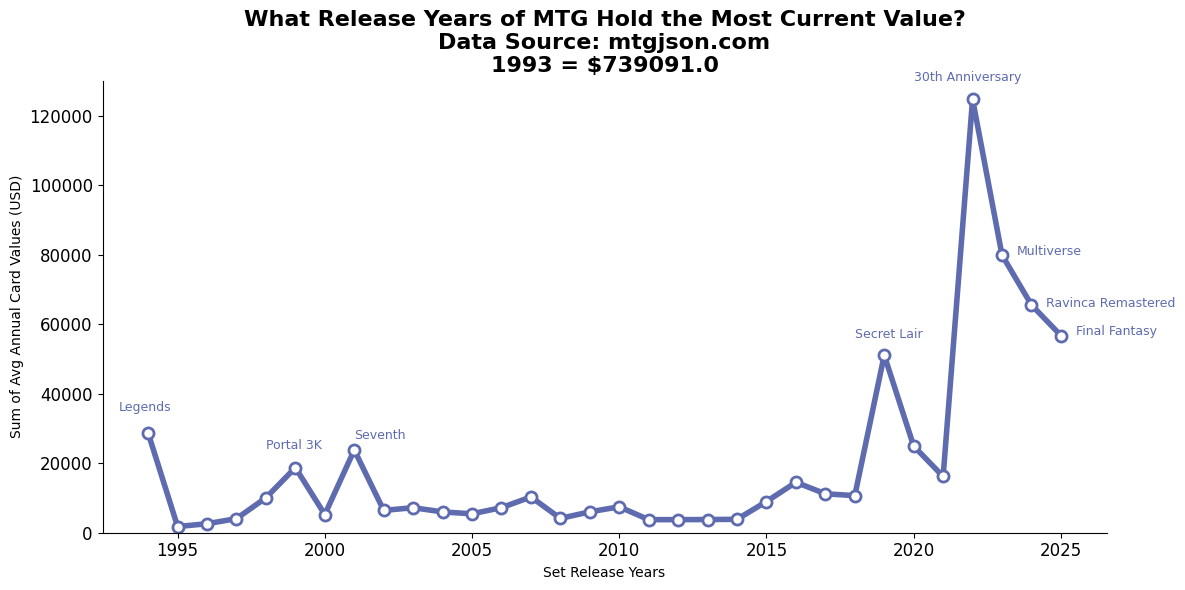

In [49]:
# Added ax.text for this 8/26/25 version of the data - it most likely won't look great for future data sets as prices fluctuate (automate?)
plt.figure(figsize=(12,6))

df3_no1993 = df3[df3['releaseYear'] != 1993]             # 1993 really skews the data, so I'll add it as a f-string in the title
sum_per_year_no1993 = df3_no1993.groupby("releaseYear")["avgPrice"].sum().reset_index()


plt.plot(sum_per_year_no1993["releaseYear"], sum_per_year_no1993["avgPrice"], color="#5F6BAF", linewidth=4, marker="o", markersize = 8, markerfacecolor = "#FFFFFF", markeredgewidth = 2)
plt.ylim(0, 130000)
plt.xlabel("Set Release Years")
plt.ylabel("Sum of Avg Annual Card Values (USD)")

value_1993 = df3.loc[df3["releaseYear"] == 1993, "avgPrice"].sum().round()
plt.title(f"What Release Years of MTG Hold the Most Current Value?\nData Source: mtgjson.com\n1993 = ${value_1993}", fontsize=16, fontweight="bold", color="black")

ax = plt.gca()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# ax.axvline(
#     2022,
#     color = "#063b0a",
#     linewidth = 0.5,
#     alpha = 0.7)

ax.text(
    1994-1,
    35000,
    "Legends",
    color = "#5F6BAF",
    fontsize = 9
)

ax.text(
    1999-1,
    24000,
    "Portal 3K",
    color = "#5F6BAF",
    fontsize = 9
)

ax.text(
    2001,
    27000,
    "Seventh",
    color = "#5F6BAF",
    fontsize = 9
)

ax.text(
    2019-1,
    56000,
    "Secret Lair",
    color = "#5F6BAF",
    fontsize = 9
)

ax.text(
    2022-2,
    130000,
    "30th Anniversary",
    color = "#5F6BAF",
    fontsize = 9
)

ax.text(
    2023+.5,
    80000,
    "Multiverse",
    color = "#5F6BAF",
    fontsize = 9
)

ax.text(
    2024+.5,
    65000,
    "Ravinca Remastered",
    color = "#5F6BAF",
    fontsize = 9
)

ax.text(
    2025+.5,
    57000,
    "Final Fantasy",
    color = "#5F6BAF",
    fontsize = 9
)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

To consider next:   
* EUR to USD api for real-time conversion to include CardMarket pricing
* Compare how many of each type or color of card in each set/year - maybe there's a trend?
* Rarity to card value comparison  
* Function for card and set value
* Compare to other TCGs?
* I found an API for set information - perhaps I can automate so I don't have to import a separate CSV  
    * However, it seems card info APIs cap responses due to the sheer number of cards